#### LGM-VIPAUGUST

#### DATA SCIENCE INTERN

#### NAME: DARSHAN M

#### TASK: IRIS FLOWER CLASSIFICATION (Beginner Level Task)

In [1]:
import cv2
import matplotlib.pyplot as plt

In [3]:
img=cv2.imread(r'C:\Users\Darshan\Desktop\LGM-VIPAUGUST INTERNSHIP\IRIS IMAGE.jpg')

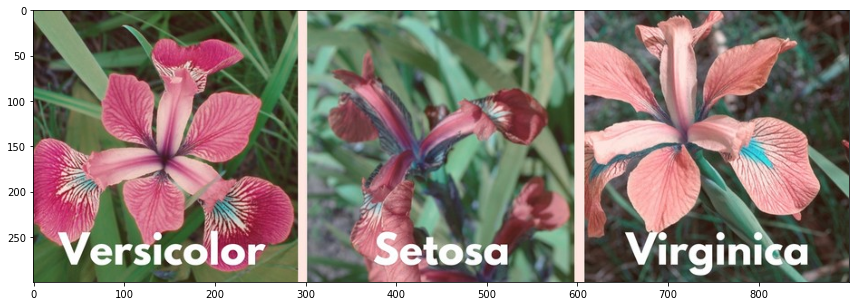

In [13]:
plt.figure(figsize=(15,5))
plt.imshow(img)

#### DATASET DESCRIPTION:-




In [130]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [76]:
df=pd.read_csv('../input/iris/Iris.csv')

In [77]:
df.head() ## displaying the first five observations of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Let's drop the ID column from the dataset

In [78]:
df=df.drop('Id',axis=1)

In [79]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### NOTE:-

1) The dataset has **no missing values**

2) Only the columns required for further analysis are retained from the dataset

Let's have a look at the five point summary of the dataset so that we can get to know some of the **statistical properties** of our data

In [81]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's have a look at the **correlation heatmap** to check the correlation strength among the variables

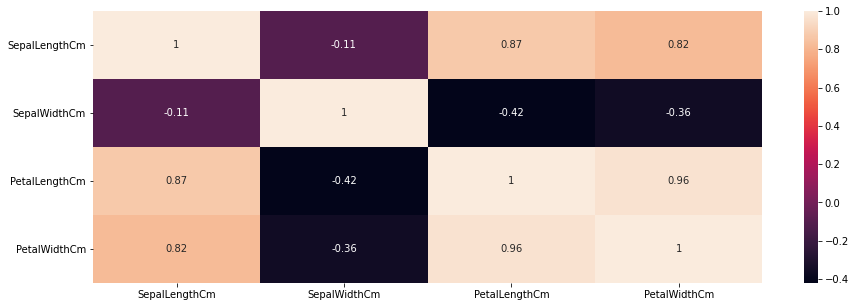

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
#plt.figure(figsize=(20,5))
plt.show()

#### Note:-

1) Here we can see that some of the variables possess positive and negative correlations

2) **High Positive correlation** 

                                      --> Petal Width and Sepal Length with correlation of 0.82

                                     --> Petal Length and Sepal Lenght with correlation of 0.87
                                 
                                     --> Petal Length and Petal Width with correlation of 0.96
                                 
3) **High Negative correlation** 

                                    --> Sepal Width and Sepal Length of -0.11

                                    --> Sepal Width and Petal Width of -0.36
                                 
                                    --> Sepal Width and Petal Length of -0.42
                                 
                                 
Colours with **lighter shade shows positive correlation** and colours with **darker shade shows negative correlation** existing among the variables


#### NOTE:-

In the given dataset we can see that **Species is a object datatype** and the remaining columns are **numerical datatypes**.

So through a pairplot lets visualise the characterstics of the same

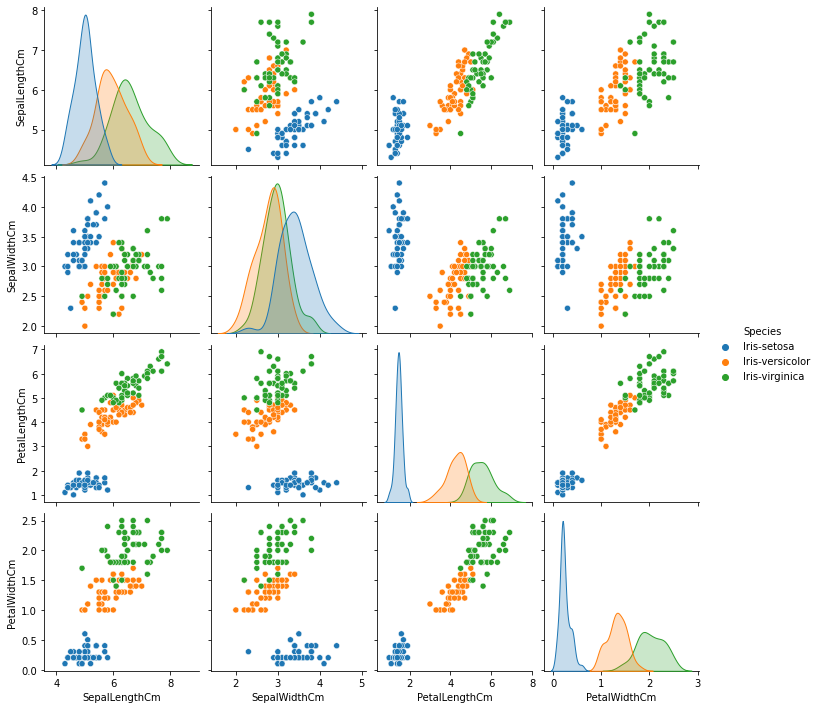

In [83]:
sns.pairplot(df,hue='Species',diag_kind='kde')
plt.show()

Let's separate the numerical and categorical attributes from the data

In [84]:
df_num=df.select_dtypes(include=np.number)
df_cat=df.select_dtypes(include='object')

In [85]:
import warnings
warnings.filterwarnings('ignore')

Before proceeding ahead let's visualise through a box-plot the distribution of the variables and also let us understand the how our numerical features vary over the **25%,50%,75% quartile ranges**

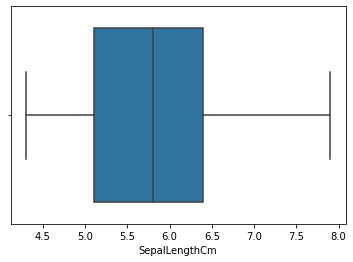

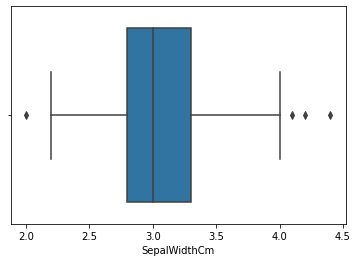

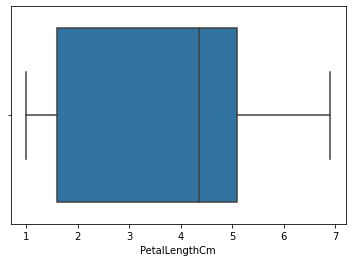

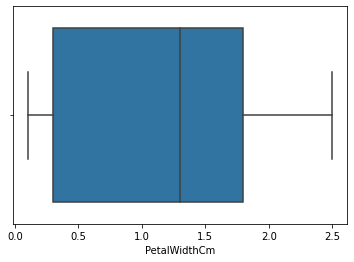

In [86]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()

#### Let's explore the performance of different Machine Learning Models

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
ss=StandardScaler()
cls=ss.fit_transform(df_num)
cls=pd.DataFrame(cls,columns=df_num.columns)
cls.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [89]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [90]:
ssd=[] ## sum of square of distance an empty list created 
score=[]  ## empty list to append silhouette scores

for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls)
    labels=kmeans.labels_
    ss=silhouette_score(cls,labels)
    ssd.append(kmeans.inertia_)
    score.append(ss)
    

In [91]:
from sklearn.metrics import silhouette_score

In [93]:
for k in range(2,11):
  
    cluster = KMeans(n_clusters = k)
    cluster_labels = cluster.fit_predict(X)
  
    # The silhouette_score gives the 
    # average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
  
    print("For no of clusters =", k,
          " The average silhouette_score is :", silhouette_avg)

For no of clusters = 2  The average silhouette_score is : 0.6808136202936816
For no of clusters = 3  The average silhouette_score is : 0.5525919445499757
For no of clusters = 4  The average silhouette_score is : 0.49699284998335724
For no of clusters = 5  The average silhouette_score is : 0.4885175508886279
For no of clusters = 6  The average silhouette_score is : 0.36820569682713084
For no of clusters = 7  The average silhouette_score is : 0.3559677254550641
For no of clusters = 8  The average silhouette_score is : 0.3417134824784926
For no of clusters = 9  The average silhouette_score is : 0.3525511533755229
For no of clusters = 10  The average silhouette_score is : 0.3298119631546675


In [94]:
print('Sum of square of distance is \n',ssd)

Sum of square of distance is 
 [223.73200573676343, 140.96837895511072, 115.51538076409035, 91.29544474066981, 80.24972235577128, 72.65522408358464, 63.7419125395911, 55.830592852739144, 47.4477276145648]


In [95]:
print('Silhouette scores is \n',score)

Silhouette scores is 
 [0.580184463257396, 0.45840087099074767, 0.41789721824741266, 0.3472646487546106, 0.3290443442233162, 0.33823487911404015, 0.3540033528971936, 0.339223136764147, 0.3471065615391573]


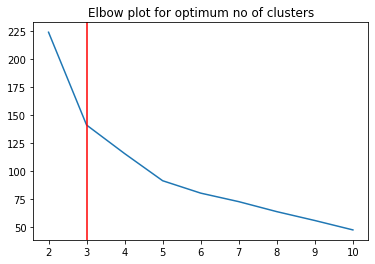

In [96]:
plt.plot(range(2,11),ssd)
plt.axvline(3,c='r')
plt.title('Elbow plot for optimum no of clusters')
plt.show()

Here we can see that the **optimum number of clusters=3** 

Let's visualise how the Silhouette scores thrugh a plot

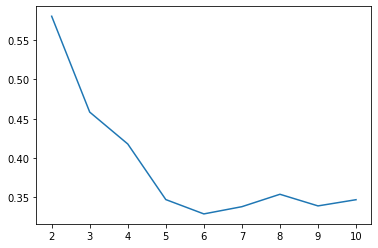

In [97]:
## Visual of how silhoette coefficients are
plt.plot(range(2,11),score)
plt.show()

Here we saw that the optimum number of clusters=3.So let's fit our KMeans model with **3 clusters**

In [100]:
kmeans=KMeans(n_clusters=3,random_state=4).fit(cls)

In [101]:
lbl=kmeans.labels_

<AxesSubplot:ylabel='count'>

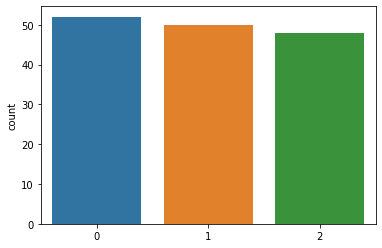

In [126]:
sns.countplot(lbl)

#### Note:-

The data is balanced.So there is no neccesity for carrying operations with respect to imbalanced data 

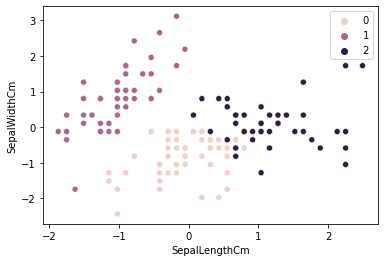

In [102]:
sns.scatterplot(cls.iloc[:,0],cls.iloc[:,1],hue=lbl)
plt.show()

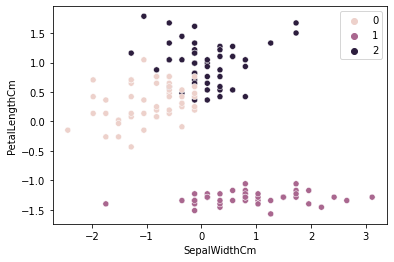

In [103]:
sns.scatterplot(cls.iloc[:,1],cls.iloc[:,2],hue=lbl)
plt.show()

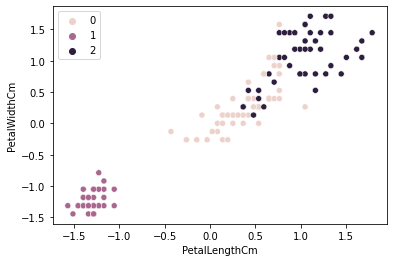

In [104]:
sns.scatterplot(cls.iloc[:,2],cls.iloc[:,3],hue=lbl)
plt.show()

In [106]:
cls.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


#### Let's explore **PCA** in order to analyse the performance with the most important features of the dataset

In [107]:
from sklearn.decomposition import PCA

In [108]:
from sklearn.decomposition import PCA
pca=PCA()
df_pc=pca.fit_transform(cls)

In [109]:
df_pc.shape

(150, 4)

In [110]:
pca.explained_variance_

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [111]:
np.cumsum(pca.explained_variance_ratio_)

array([0.72770452, 0.95800975, 0.99484807, 1.        ])

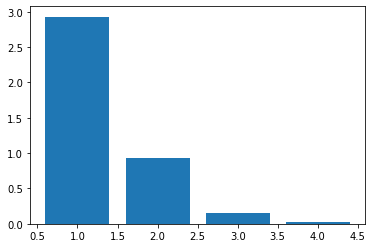

In [115]:
plt.bar(range(1,5),pca.explained_variance_)
plt.show()

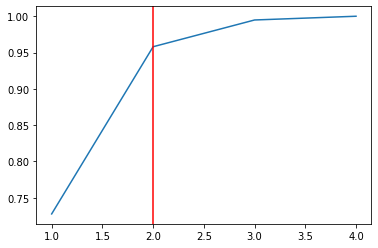

In [117]:
plt.plot(range(1,5),np.cumsum(pca.explained_variance_ratio_))
plt.axvline(2,c='r')
plt.show()

#### Note:-

Here we can see that **2 components** are able to capture **95%** of the total variation in the data

#### Interpretation:-

From the experimental analysis of PCA,let's fit the model with the 2 componets that is 95% of the total variation captured

In [118]:
pca=PCA(0.95)
df_pc=pca.fit_transform(cls)

In [119]:
df_pc.shape

(150, 2)

#### Note:-

Here we can see that we are carry forwarding only the two components for the model evaluation

In [120]:
pca.explained_variance_

array([2.93035378, 0.92740362])

In [121]:
np.cumsum(pca.explained_variance_ratio_)

array([0.72770452, 0.95800975])

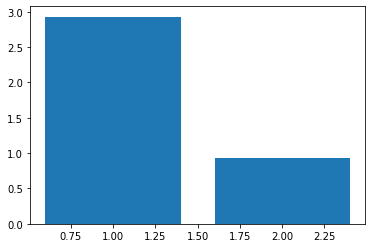

In [123]:
plt.bar(range(1,3),pca.explained_variance_)
plt.show()

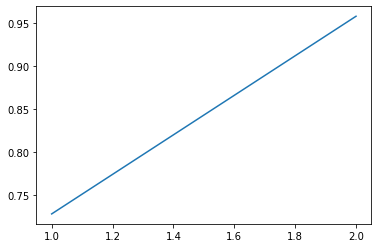

In [125]:
plt.plot(range(1,3),np.cumsum(pca.explained_variance_ratio_))
#plt.axvline(2,c='r')
plt.show()

#### Note:-

The above plot shows that how our variation varies to a range of 95% from the first to the second component

Let's have a look at a **Decision Tree Visual** for even more better understanding

So for evaluating the same let's load the same Iris dataset from the sklearn library

In [141]:
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [128]:
iris=datasets.load_iris()

In [129]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [131]:
df1=pd.DataFrame(iris['data'],columns=iris['feature_names'])
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [132]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Note:-

1) **0** indicates the species of iris flower as **Iris-Setosa**

2) **1** indicates the species of iris flower as **Iris-Versicolour**

3) **2** indicates the species of iris flower as **Iris-Virginica**

In [136]:
X=df1
y=iris.target

In [138]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
first_tree=DecisionTreeClassifier(criterion='gini',
                                 max_depth=None, ## to run until to get pure node
                                 min_samples_split=2,
                                 max_features=None,
                                 max_leaf_nodes=None)

In [144]:
first_tree.fit(X_train,y_train)

DecisionTreeClassifier()

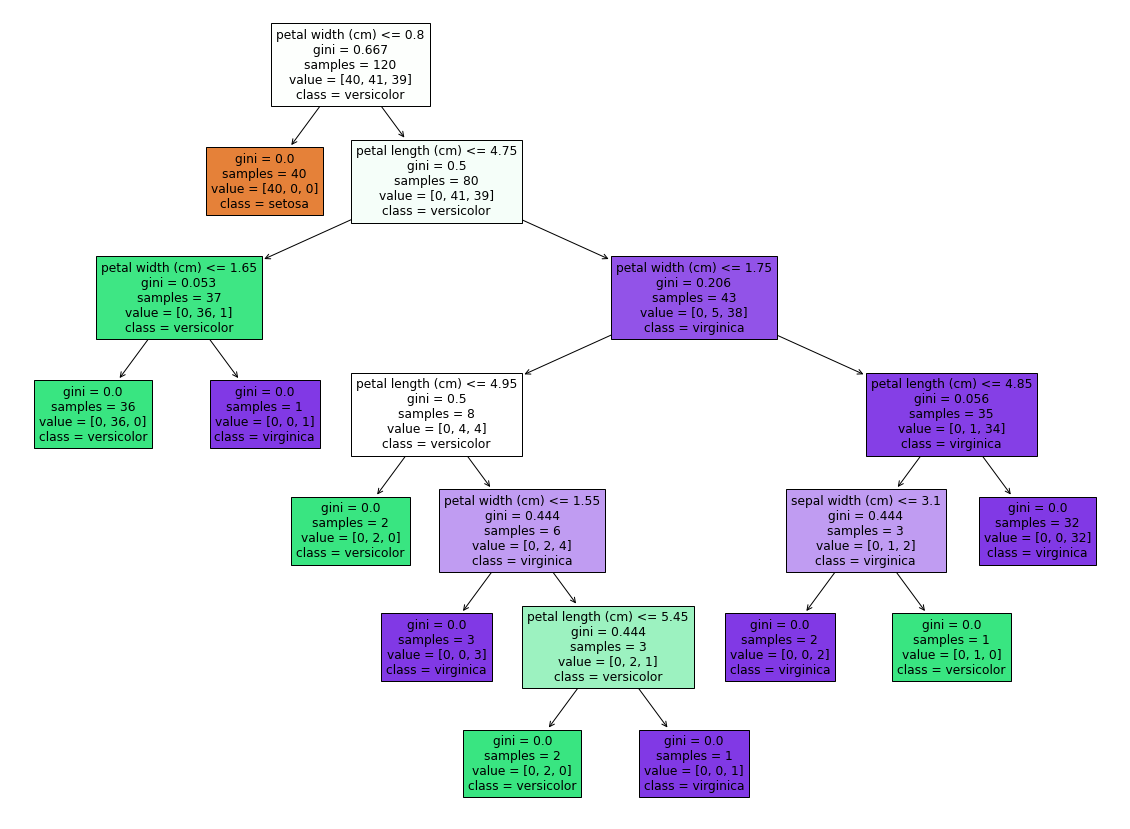

In [150]:
plt.figure(figsize=(20,15))
tree.plot_tree(decision_tree=first_tree,
              class_names=iris.target_names,
              filled=True,
              label='all',
              feature_names=iris.feature_names)

plt.show()

The Decision tree models until **pure nodes** are obtained

In [151]:
y_pred=first_tree.predict(X_test)

In [152]:
from sklearn.metrics import confusion_matrix

In [153]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])